In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
! kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 941kB/s]


In [ ]:
! unzip -u '/content/gdrive/My Drive/Colab Notebooks/heart-disease-dataset' -d '/content/gdrive/My Drive/Colab Notebooks/Heart Disease'

Archive:  /content/gdrive/My Drive/Colab Notebooks/heart-disease-dataset.zip
  inflating: /content/gdrive/My Drive/Colab Notebooks/Heart Disease/heart.csv  


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, datetime

In [ ]:
heart_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Heart Disease/heart.csv')                                                  
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data['target'].unique()

array([0, 1])

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
labels = heart_data['target']
features = heart_data.drop('target',axis=1)
print("Heart Disease dataset has {} data points with {} variables each.".format(*heart_data.shape))

Heart Disease dataset has 1025 data points with 14 variables each.


In [ ]:
print('Features')
print(features.head())
print('-----------------------------------')
print('\nLabels\n')
print(labels.head())

Features
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
-----------------------------------

Labels

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

SEED=12345

X_train, X_test, y_train,y_test= train_test_split(features,labels,test_size=0.2,random_state=SEED)

In [ ]:
#STANDARDIZATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Input shape
nan = X_train.shape[1]
inputs = keras.Input(shape=(nan,))

# Out shape = number of classes
nClass = len(np.unique(y_test))

In [ ]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(nan,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(nClass, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=3,verbose=1,restore_best_weights=True)

In [ ]:
# Model training
BATCH_SIZE =16
EPOCHS= 50
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[es])

Epoch 1/50
52/52 [==============================] - 1s 6ms/step - loss: 0.6139 - accuracy: 0.6976 - val_loss: 0.5018 - val_accuracy: 0.7707
Epoch 2/50
52/52 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8000 - val_loss: 0.3887 - val_accuracy: 0.7902
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8341 - val_loss: 0.3469 - val_accuracy: 0.8537
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8524 - val_loss: 0.3350 - val_accuracy: 0.8537
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8476 - val_loss: 0.3271 - val_accuracy: 0.8537
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8646 - val_loss: 0.3106 - val_accuracy: 0.8683
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8585 - val_loss: 0.3070 - val_accuracy: 0.8683
Epoch 8/50
52/52 [==

In [ ]:
train_eval = model.evaluate(X_train,y_train)
test_eval = model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9171


In [ ]:
# Train accuracy score
print(f"Train Evaluation : { round(train_eval[1]*100,2)}%")

# Test accuracy score
print(f"Test Evaluation : { round(test_eval[1]*100,2)}%")

Train Evaluation : 95.98%
Test Evaluation : 91.71%


Visualize

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_x = history.epoch

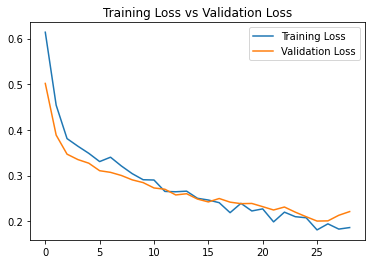

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epoch_x,train_loss, label='Training Loss')
plt.plot(epoch_x, val_loss, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.figure()

plt.show()

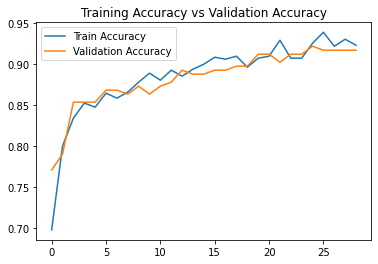

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epoch_x, train_acc,label='Train Accuracy')
plt.plot(epoch_x, val_acc, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

plt.show()

In [ ]:
predictions = np.argmax(model.predict(X_test),axis=1)

In [ ]:
label_vs_prediction = np.transpose(np.vstack((y_test,predictions)))
print('label_vs_prediction\n', label_vs_prediction)

label_vs_prediction
 [[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(f"Confusion Matrix : \n {confusion_matrix(predictions,y_test)}")
print(f"Accuracy Score : \n {accuracy_score(predictions,y_test)}")

#metrics.accuracy_score(y_test, predictions)

Confusion Matrix : 
 [[99  5]
 [12 89]]
Accuracy Score : 
 0.9170731707317074
